You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [5]:
import pandas as pd

df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
df.shape

(13200, 7)

In [7]:
# Step - 1
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [13]:
df_after_quantile = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df_after_quantile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [17]:
no_of_rows_removed = df.shape[0] - df_after_quantile.shape[0]
no_of_rows_removed

28

In [21]:
# step - 2

upper_limit = df_after_quantile.price_per_sqft.mean() + 4*df_after_quantile.price_per_sqft.std()
lower_limit = df_after_quantile.price_per_sqft.mean() - 4*df_after_quantile.price_per_sqft.std()

upper_limit, lower_limit

(23227.73653589429, -9900.429065502549)

In [23]:
df_final = df_after_quantile[(df_after_quantile.price_per_sqft<upper_limit) & (df_after_quantile.price_per_sqft>lower_limit)]
df_final

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [27]:
no_of_rows_final =  df_after_quantile.shape[0] - df_final.shape[0] + no_of_rows_removed
no_of_rows_final

153

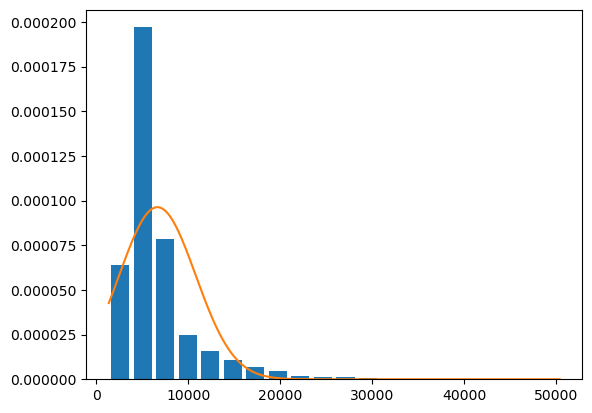

In [29]:
# Step - 3
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df_after_quantile.price_per_sqft, bins = 20, rwidth=0.8, density = True)

rng = np.arange(df_after_quantile.price_per_sqft.min(), df_after_quantile.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df_after_quantile.price_per_sqft.mean(), df_after_quantile.price_per_sqft.std()))

The data is Right Skewed

In [32]:
df_after_quantile['zscore'] = (df_after_quantile.price_per_sqft - df_after_quantile.price_per_sqft.mean())/df_after_quantile.price_per_sqft.std()
df_after_quantile.head()

C:\Users\yoges\AppData\Local\Temp\ipykernel_9720\317675639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_quantile['zscore'] = (df_after_quantile.price_per_sqft - df_after_quantile.price_per_sqft.mean())/df_after_quantile.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [40]:
df_final_1 = df_after_quantile[(df_after_quantile['zscore'] < 4)&(df_after_quantile['zscore']>-4)]
df_final_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [42]:
no_of_rows_final_1 = df_after_quantile.shape[0] - df_final_1.shape[0] + no_of_rows_removed
no_of_rows_final_1

153

In [44]:
no_of_rows_final == no_of_rows_final_1

True

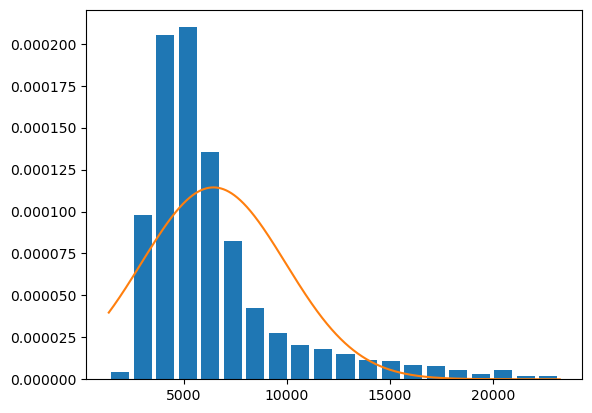

In [46]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df_final_1.price_per_sqft, bins = 20, rwidth=0.8, density = True)

rng = np.arange(df_final_1.price_per_sqft.min(), df_final_1.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df_final_1.price_per_sqft.mean(), df_final_1.price_per_sqft.std()))